# Creating Customer Segments

### Unsupervised Learning

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."


In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
# Write code here
data = pd.read_csv('customers.csv')
df = data.copy()

**Task 2: Drop Region and Channel column**

In [3]:
# Write code here
df.drop(['Region', 'Channel'], axis = 1, inplace = True)    

**Task 3: Display first five rows** 

In [4]:
# Write code here
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### **Task 4: Display last five rows** 

In [5]:
# Write code here
df.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


#### **Task 5: Check the number of rows and columns**

In [6]:
# Write code here
df.shape

(440, 6)

#### **Task 6: Check data types of all columns**

In [7]:
# Write code here
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

**Task 7: Check for missing values and fill missing values if required.**

In [14]:
# Write code here
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

#### **Task 8: Check summary statistics and store the resultant DataFrame in a new variable named *stats***

In [15]:
# Write code here
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**Logic in selecting the 3 samples: Quartiles**
- As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
    - This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

**Task 9: Select any random sample and assign the list to given variable**

In [16]:
# Write code here
np.random.seed(2018)
indices = np.random.randint(low = 0, high = 441, size = 3)
print("Indices of Samples => {}".format(indices))

Indices of Samples => [250 102 226]


These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents

**Task 10: Make a dataframe of selected indices**

In [17]:
# Write code here
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("\nChosen samples of wholesale customers dataset:")
display(samples)


Chosen samples of wholesale customers dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,1,3191,1993,1799,1730,234,710
1,2,3,2932,6459,7677,2561,4573,1386
2,2,1,20782,5921,9212,1759,2568,1553


The selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category

In [18]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
250,25.7,32.7,18.4,53.4,22.3,39.9
102,23.2,71.4,65.7,66.1,79.3,64.5
226,82.7,66.6,70.7,54.3,67.3,70.0


**Drawing a heatmap to show the above results achieved in** `percentile` **to have a better understanding.**

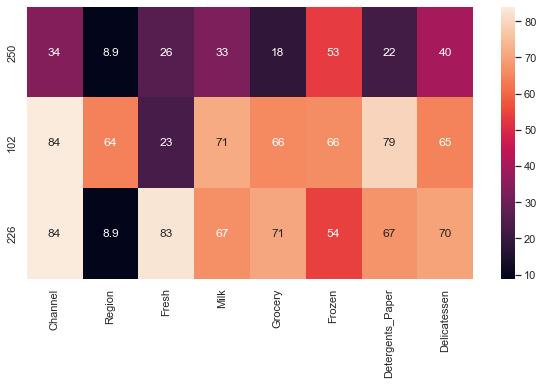

In [19]:
#Write code here
percentiles_data = 100*data.rank(pct=True)
percentiles_samples = percentiles_data.iloc[indices]
plt.subplots(figsize=(10,5))
_ = sns.heatmap(percentiles_samples, annot=True)

**Finding the corelation among all the variables of whole dataframe and describe the findings you infer from the heatmapt.**

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


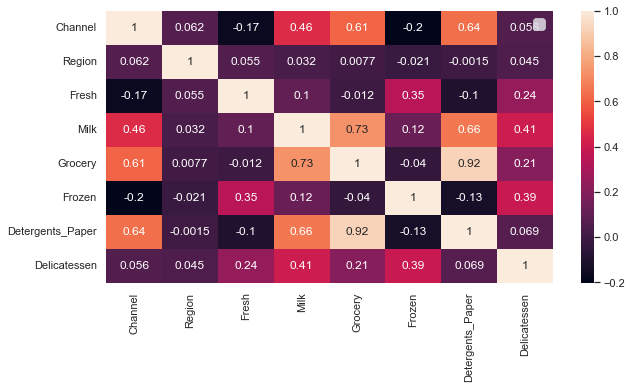

In [20]:
# Write the code here
corr = data.corr()

plt.figure(figsize = (10,5))
ax = sns.heatmap(corr, annot=True)
ax.legend(loc=0, prop={'size': 15})

### Pair Plot

**Making a pairplot using seaborn.**

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


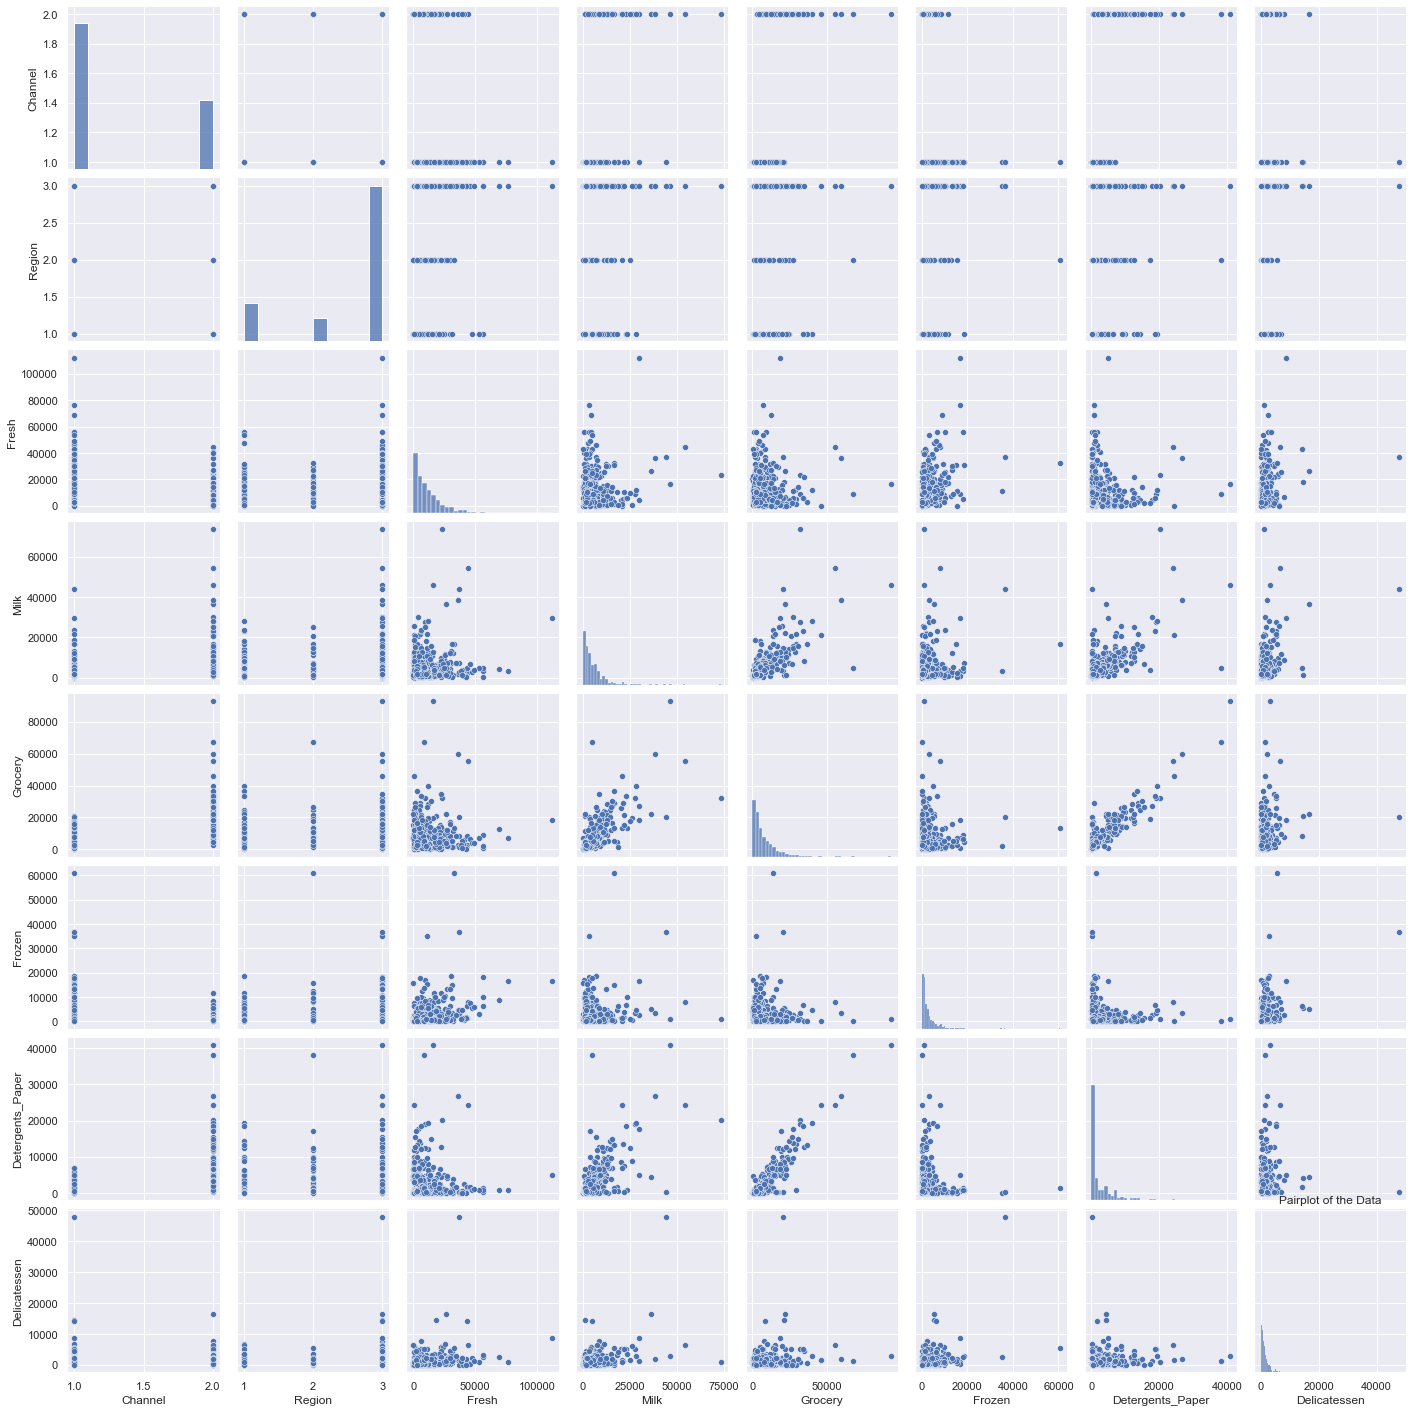

In [21]:
# write code here
sns.pairplot(data)
plt.title('Pairplot of the Data')
plt.show()

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

**Applying log on data for transforming it from skewed to normalized form. Use function** `np.log()` **and save the result in** `log_data`

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


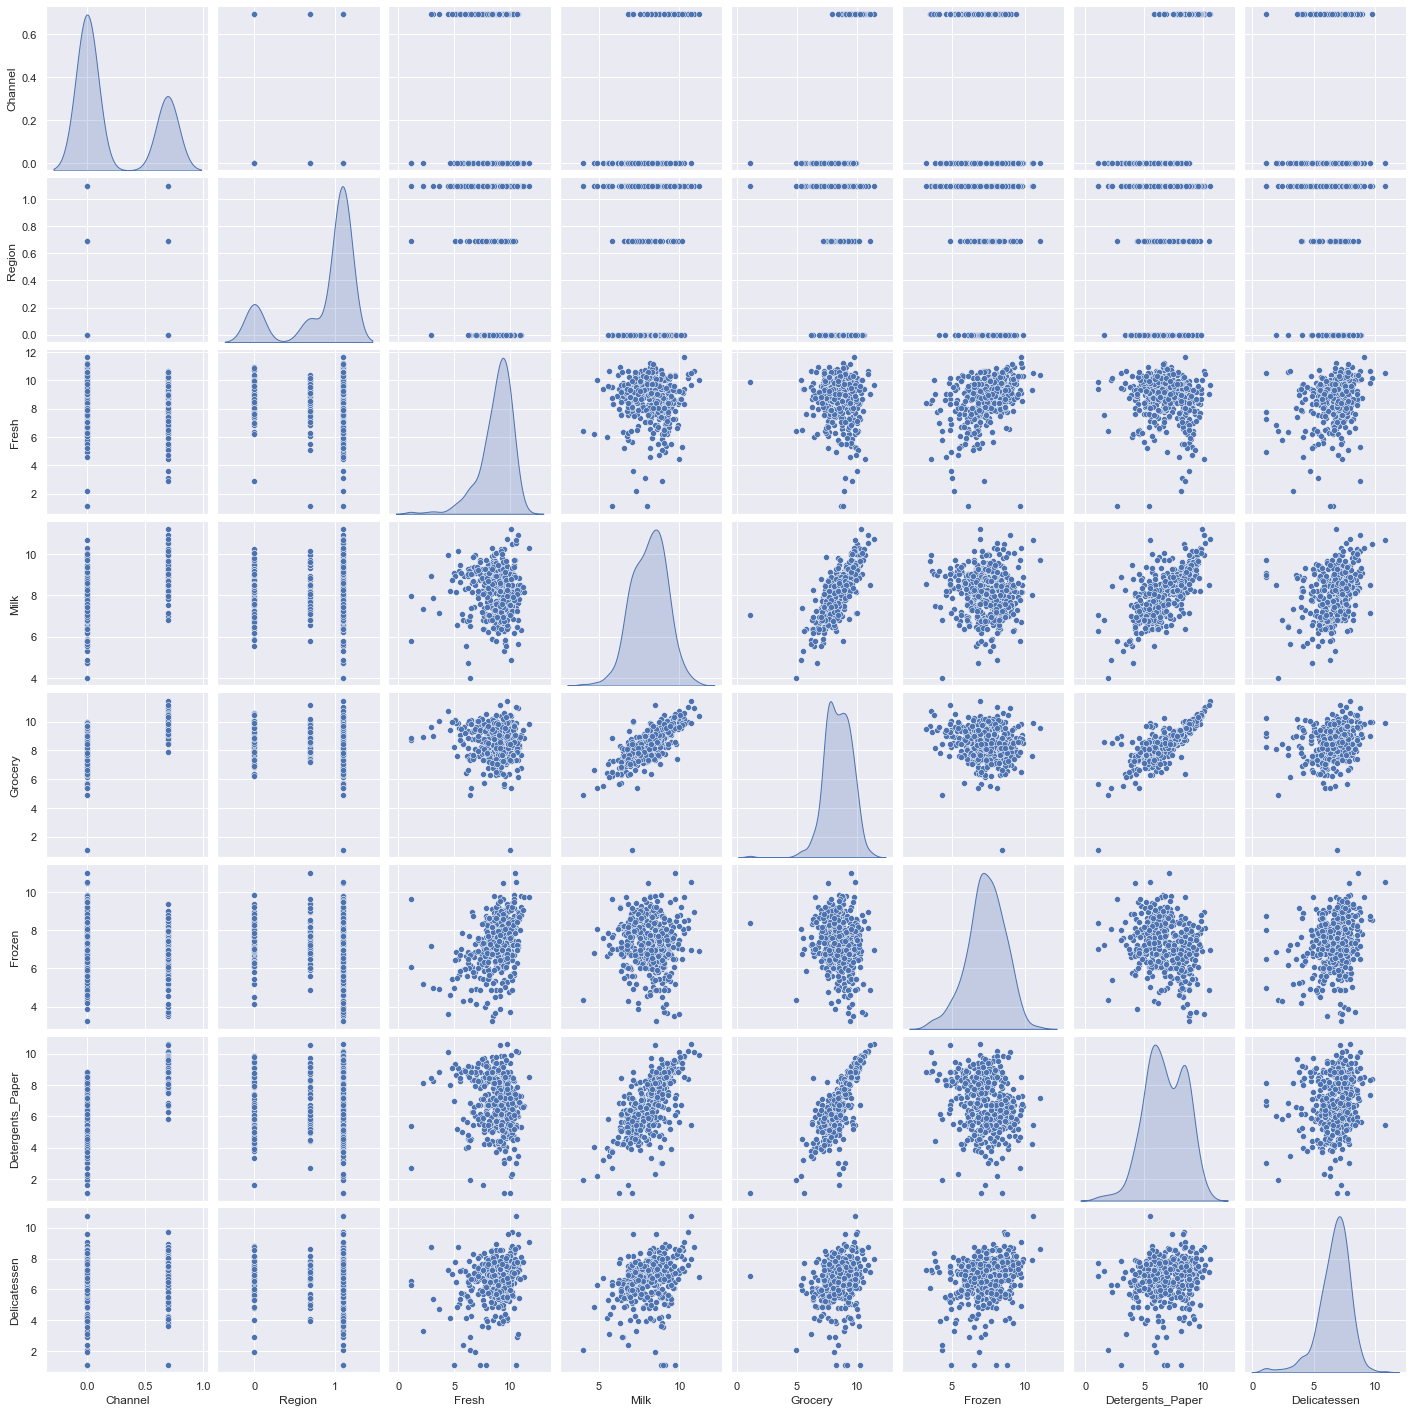

In [22]:
#Write code here
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
_ = sns.pairplot(log_data, diag_kind = 'kde')

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to Q3. Again, use `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [24]:
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data, 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data, 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5

    
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(out)
    outliers=outliers+list(out.index.values)
    
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    
print ("Outliers: {}".format(outliers))

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Channel':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Region':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Fresh':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Milk':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Grocery':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Frozen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Detergents_Paper':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Data points considered outliers for the feature 'Delicatessen':


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen


Outliers: []


**Making a pairplot to check changes in data after pre-processing and using the** `good_data`

C:\Python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


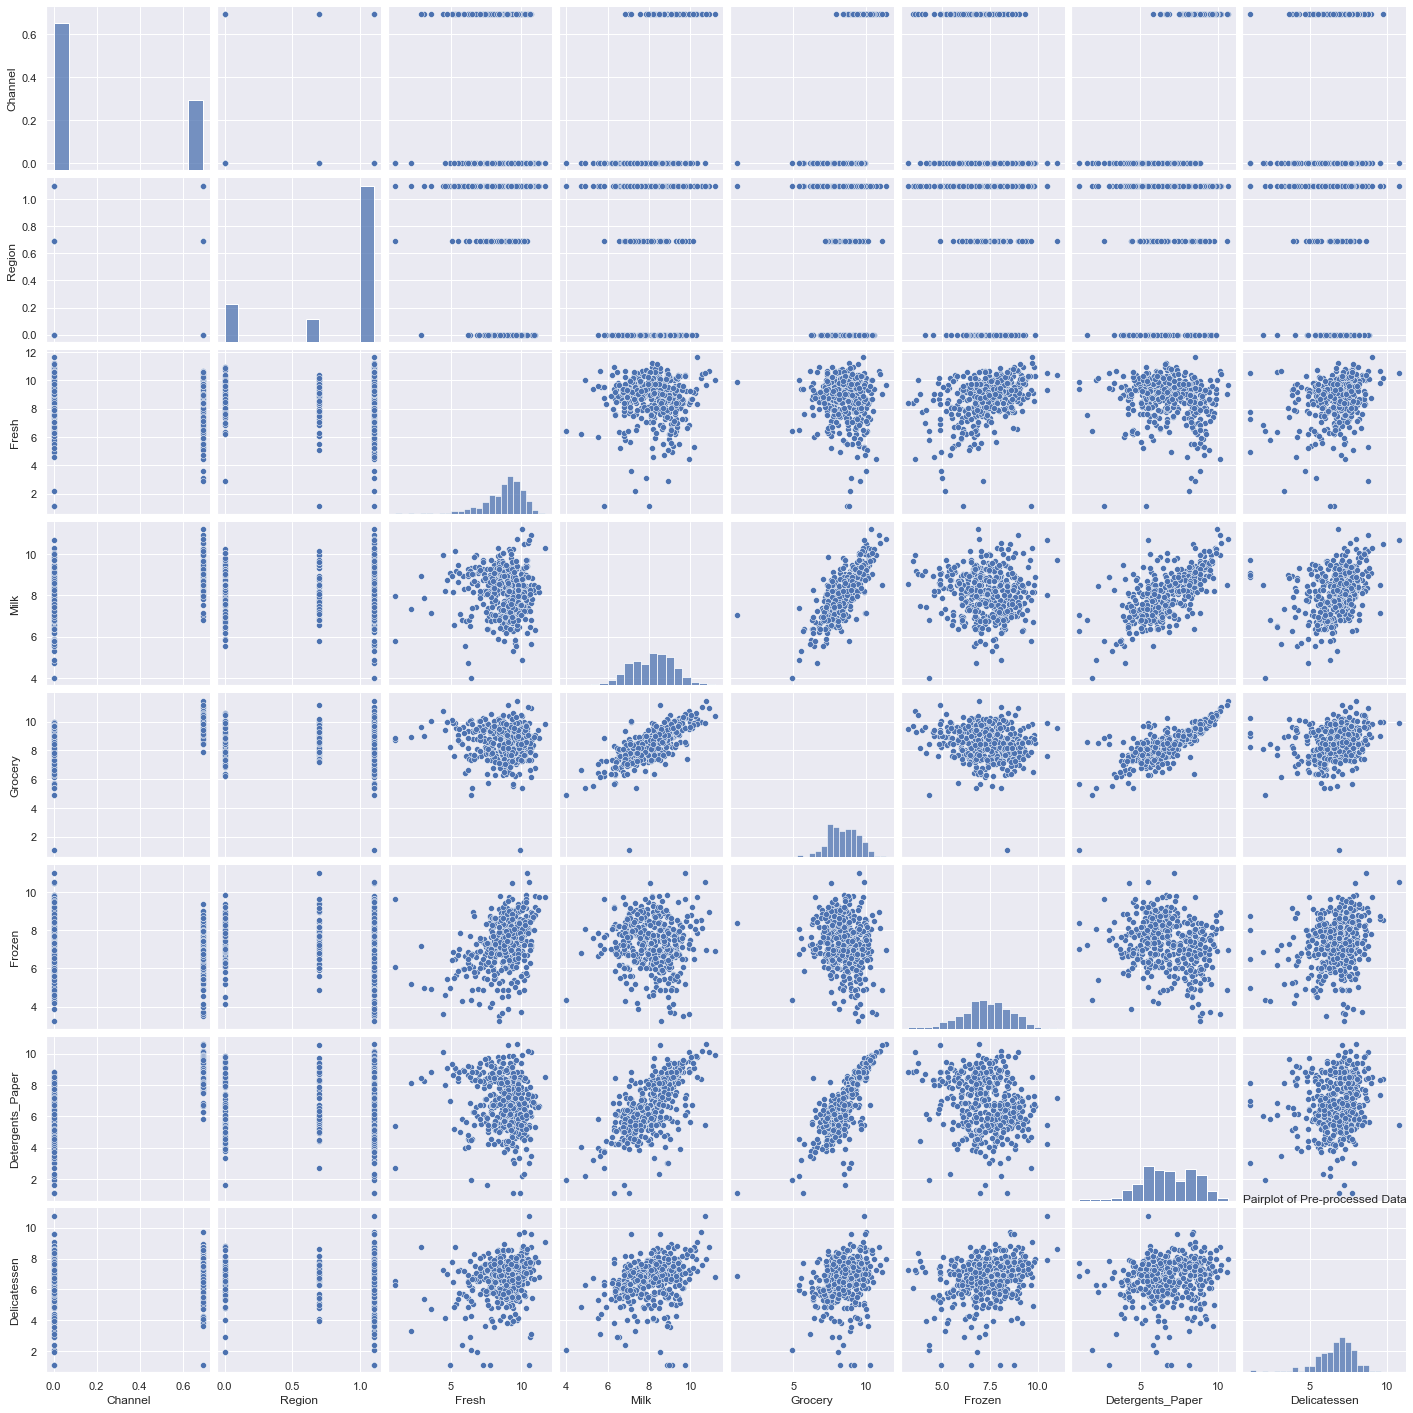

In [25]:
# Write the code here
sns.pairplot(good_data)
plt.title('Pairplot of Pre-processed Data')
plt.show()

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and 
 - Apply a PCA transformation of the good data.

**Importing PCA Library**

In [26]:
# Write your code here
from sklearn.decomposition import PCA

**Applying PCA by fitting the good data with the same number of dimensions as features.**

In [27]:
# Write your code here
num_features = good_data.shape[1]

# Initialize PCA with the number of components equal to the number of features
pca = PCA(n_components=num_features)

# Apply PCA to the pre-processed data
pca_result = pca.fit_transform(good_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(num_features)])

# Display the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Display the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative Explained Variance:")
print(cumulative_explained_variance)

Explained Variance Ratio:
[0.43661076 0.26970604 0.11338657 0.09387986 0.04463886 0.02243284
 0.01528407 0.004061  ]

Cumulative Explained Variance:
[0.43661076 0.7063168  0.81970338 0.91358324 0.95822209 0.98065493
 0.995939   1.        ]


In [ ]:
# Write your code here


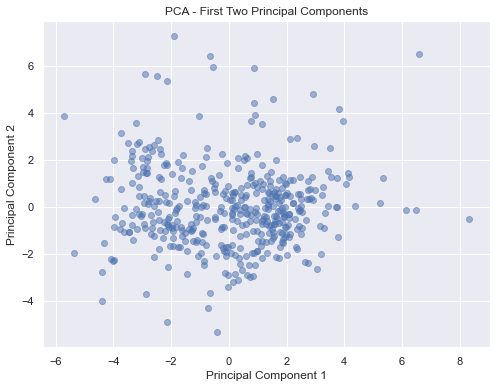

([<matplotlib.axis.XTick at 0x285309db4f0>,
 [Text(1, 0, '1'), Text(2, 0, '2')])

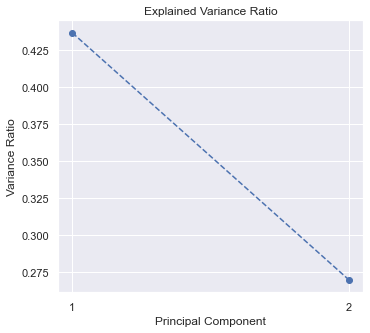

In [35]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(good_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plotting the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plotting Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(12, 5))

# Explained Variance Ratio Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio) + 1))



**Task 18: Find cumulative explained variance**

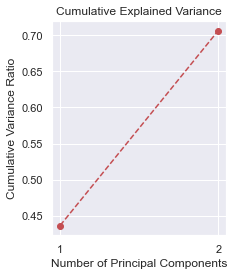

In [36]:
# Write the code here
# Cumulative Explained Variance Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))

plt.tight_layout()
plt.show()

**Question**
How much variance in the data is explained ***in total*** by the first and second principal component? What about the first four principal components? How many components should be selected for reducing the dimensions? Give your answer along with the reason.

**Answer:**

### Implementation: Dimensionality Reduction
In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

**Task 19: Apply PCA by fitting the good data with the selected number of components**

In [37]:
from sklearn.decomposition import PCA

# Step 1: Initialize PCA with 2 components and fit it on good_data
pca = PCA(n_components=2)
pca.fit(good_data)

PCA(n_components=2)

**Task 20: Transform the good data using the PCA fit above**

In [38]:
# write your code here
reduced_data = pca.transform(good_data)

**Task 21: Create a DataFrame for the reduced data**

In [39]:
# write your code here
reduced_data_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])

In [40]:
# Display the first few rows of the DataFrame
print("Reduced Data DataFrame (first few rows):")
print(reduced_data_df.head())

Reduced Data DataFrame (first few rows):
        PC1       PC2
0 -1.793834 -0.068975
1 -1.841464 -0.868573
2 -1.932801 -1.675631
3  1.145193 -1.456108
4 -0.842677 -2.458586


## Implementation: Creating Clusters

In this section, you will choose to use either a K-Means clustering algorithm  and hierarchical clustering to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, choose the optimal K using the following method**

- Silhouette Score
- Elbow Method

### Silhouette Score for K-Means

In [41]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Task 22-a: Check Silhouette Score for finding Optimal K**

In [42]:
# Assume reduced_data is already obtained from PCA transformation

# Define the range of K values to test
k_values = range(2, 11)  # Testing from 2 to 10 clusters

# Initialize a list to store silhouette scores
silhouette_avg = []

# Loop over the range of K values
for k in k_values:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_data)  # Use the PCA-reduced data
    
    # Calculate silhouette score
    score = silhouette_score(reduced_data, cluster_labels)
    silhouette_avg.append(score)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

**Task 23-a: Plot a graph representing the Silhouette Score.**

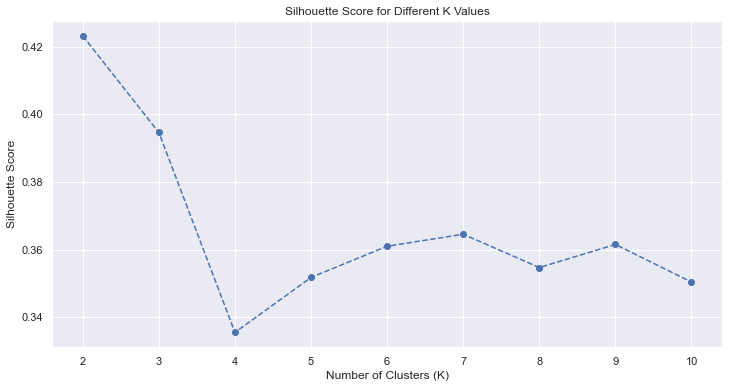

In [43]:
#add plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_avg, marker='o', linestyle='--')
plt.title('Silhouette Score for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


**Task 22-b: Apply Elbow Method for finding Optimal K**

In [44]:
# Define the range of K values to test
k_values = range(1, 11)  # Testing from 1 to 10 clusters

# Initialize a list to store inertia values
inertia = []

# Loop over the range of K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_data)  # Use the PCA-reduced data
    inertia.append(kmeans.inertia_)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

**Task 23-b: Plot a graph representing the Elbow Method.**

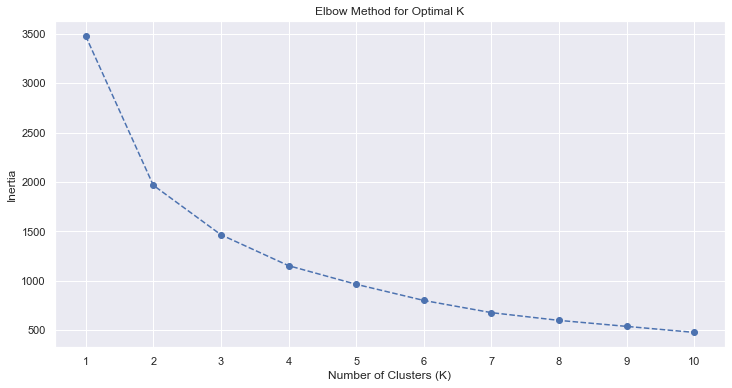

K = 1: Inertia = 3477.4595
K = 2: Inertia = 1967.1938
K = 3: Inertia = 1466.6852
K = 4: Inertia = 1153.6565
K = 5: Inertia = 965.4240
K = 6: Inertia = 802.0024
K = 7: Inertia = 678.5816
K = 8: Inertia = 600.2436
K = 9: Inertia = 539.5980
K = 10: Inertia = 478.5713


In [45]:
#add plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Print inertia for each K
for k, i in zip(k_values, inertia):
    print(f'K = {k}: Inertia = {i:.4f}')

## Implementation of K-Means

**Task 24: Implement KMeans using your choosen K**

In [46]:
chosen_k = 4  # Replace with the optimal K value from your analysis

# Step 1: Initialize K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=chosen_k, random_state=42)

# Step 2: Fit the K-Means model to the PCA-reduced data
kmeans.fit(reduced_data)

C:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [47]:
# Step 3: Predict clusters for each data point
preds = kmeans.predict(reduced_data)

In [48]:
# Print the cluster centers and the first few cluster assignments
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("\nFirst few cluster assignments:")
print(preds[:10])

Cluster Centers:
[[ 0.92774783 -1.01824556]
 [-2.31006574  2.40025848]
 [ 2.357585    1.06519713]
 [-2.20995061 -0.83791671]]

First few cluster assignments:
[3 3 3 0 3 3 3 3 3 3]


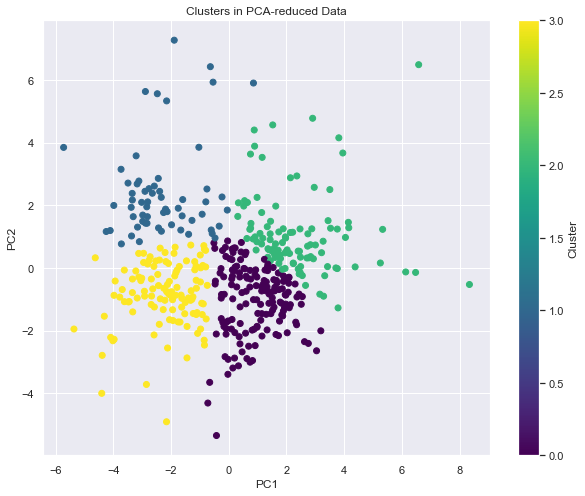

In [49]:
# Create a DataFrame for the reduced data and cluster assignments
reduced_data_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
reduced_data_df['Cluster'] = preds

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], c=reduced_data_df['Cluster'], cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters in PCA-reduced Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

## Implementation Hierarchical Clustering

**Task 25: Implement Hierarchical(agglomerative) clustering using your choosen K**

In [51]:
from sklearn.cluster import AgglomerativeClustering
chosen_k = 4  # Replace with the optimal K value from your analysis

# Step 1: Initialize Agglomerative Clustering with the chosen number of clusters
a_cluster = AgglomerativeClustering(n_clusters=chosen_k)

In [52]:
# write your code here
preds_agg = a_cluster.fit_predict(reduced_data)

In [53]:
# Print the first few cluster assignments
print("First few cluster assignments (Agglomerative):")
print(preds_agg[:10])

First few cluster assignments (Agglomerative):
[1 1 2 0 2 0 0 1 0 1]


## Best Clustering Algorithm?

**You will be using** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]` . Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.

In [54]:
true_labels = data['Channel'].drop(data['Channel'].index[outliers]).reset_index(drop = True)

**Task 26: Find the adjusted rand index for K-Means and Agglomerative Clustering**

In [55]:
# Import necessary libraries
from sklearn.metrics import adjusted_rand_score

In [59]:
# Calculate ARI for K-Means
ari_kmeans = adjusted_rand_score(true_labels, preds)
print(f'Adjusted Rand Index for K-Means: {ari_kmeans:.4f}')

Adjusted Rand Index for K-Means: 0.2987


In [57]:
# Calculate ARI for Hierarchical Clustering
ari_agg = adjusted_rand_score(true_labels, preds_agg)
print(f'Adjusted Rand Index for Hierarchical Clustering: {ari_agg:.4f}')

Adjusted Rand Index for Hierarchical Clustering: 0.4415


**Hierarchical Clustering better matches the true labels and is therefore the preferred clustering algorithm in this case.**

## Visualizing the clusters

**Task 27: Get the centers for KMeans**

In [60]:
# Write code here
cluster_centers = kmeans.cluster_centers_

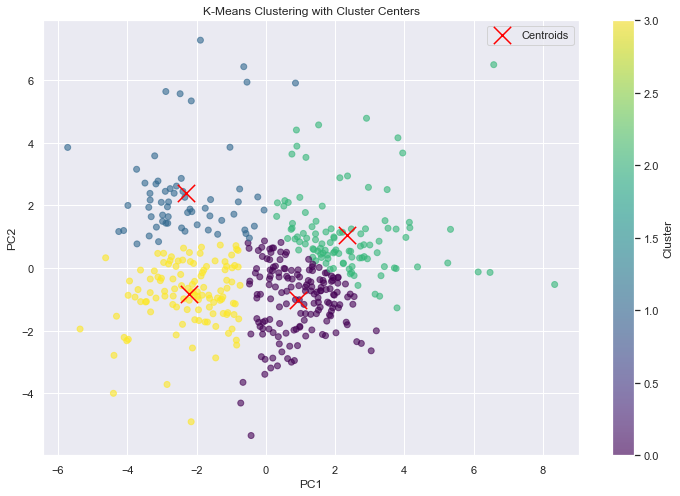

In [63]:
# Create a DataFrame for the reduced data and cluster assignments
reduced_data_df = pd.DataFrame(data=reduced_data, columns=['PC1', 'PC2'])
reduced_data_df['Cluster'] = preds

# Plot the clusters and cluster centers
plt.figure(figsize=(12, 8))

# Plot data points
scatter = plt.scatter(reduced_data_df['PC1'], reduced_data_df['PC2'], c=reduced_data_df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.colorbar(scatter, label='Cluster')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x', label='Centroids')

plt.title('K-Means Clustering with Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

# Profiling

In [68]:
df_filtered = df.drop(df.index[outliers]).reset_index(drop = True)

**Task 28: Get the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [77]:
import pandas as pd

# Assuming df is your original DataFrame and df_pred contains cluster predictions
# Remove outliers from the original DataFrame
df_filtered = df.drop(df.index[outliers]).reset_index(drop=True)

# Add cluster predictions to the filtered DataFrame
df_pred = df_filtered.copy()
df_pred['pred'] = preds

# List of product categories
categories = ['FRESH', 'MILK', 'GROCERY', 'FROZEN', 'DETERGENTS_PAPER', 'DELICATESSEN']

# Print columns and index to verify
print("Columns in df_pred:")
print(df_pred.columns)
print("Index of df_pred:")
print(df_pred.index)

# Filter categories that are present in df_pred
valid_categories = [col for col in categories if col in df_pred.columns]

# Calculate the average spending for each valid category within each cluster
cluster_profiles = df_pred.groupby('pred')[valid_categories].mean().reset_index()

# Display the profiles
print("Cluster Profiles:")
print(cluster_profiles)


Columns in df_pred:
Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen', 'pred'],
      dtype='object')
Index of df_pred:
RangeIndex(start=0, stop=440, step=1)
Cluster Profiles:
   pred
0     0
1     1
2     2
3     3


**Task 29: Make a radar chart to show a better profile for each cluster.**

In [79]:
# Write the code to import the library files for plotly and set your credentials
cluster_profiles = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],  # Example cluster labels
    'FRESH': [100, 80, 90, 70],
    'MILK': [50, 60, 55, 45],
    'GROCERY': [200, 150, 180, 160],
    'FROZEN': [30, 20, 25, 15],
    'DETERGENTS_PAPER': [70, 80, 75, 65],
    'DELICATESSEN': [40, 50, 45, 35]
})

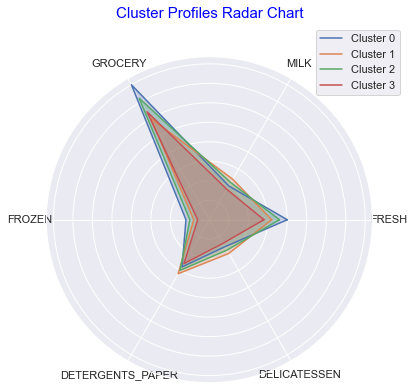

In [80]:
# write the code here
import matplotlib.pyplot as plt
from math import pi

# Function to create radar chart
def create_radar_chart(data, categories, cluster_col='Cluster'):
    num_clusters = len(data)
    num_vars = len(categories)

    # Compute angle for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.title('Cluster Profiles Radar Chart', size=15, color='blue', y=1.1)

    for i in range(num_clusters):
        values = data.loc[i, categories].tolist()
        values += values[:1]  # Complete the loop

        ax.plot(angles, values, label=f'Cluster {i}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Prepare the categories
categories = ['FRESH', 'MILK', 'GROCERY', 'FROZEN', 'DETERGENTS_PAPER', 'DELICATESSEN']

# Create radar chart
create_radar_chart(cluster_profiles, categories)


**Task 30: Make the data set for radar chart**

Radar Chart Data:
   Cluster  FRESH  MILK  GROCERY  FROZEN  DETERGENTS_PAPER  DELICATESSEN
0        0    100    50      200      30                70            40
1        1     80    60      150      20                80            50
2        2     90    55      180      25                75            45
3        3     70    45      160      15                65            35


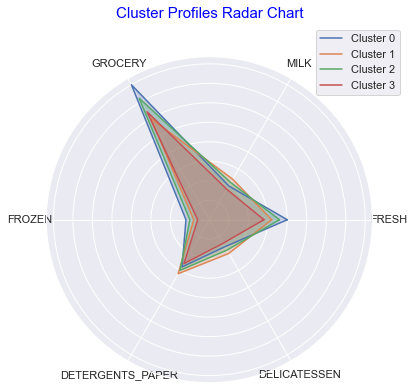

In [81]:
# Write your code here
import pandas as pd

# Example cluster profiles DataFrame
# Replace this with your actual 'cluster_profiles' DataFrame
cluster_profiles = pd.DataFrame({
    'Cluster': [0, 1, 2, 3],  # Example cluster labels
    'FRESH': [100, 80, 90, 70],
    'MILK': [50, 60, 55, 45],
    'GROCERY': [200, 150, 180, 160],
    'FROZEN': [30, 20, 25, 15],
    'DETERGENTS_PAPER': [70, 80, 75, 65],
    'DELICATESSEN': [40, 50, 45, 35]
})

# Define the categories
categories = ['FRESH', 'MILK', 'GROCERY', 'FROZEN', 'DETERGENTS_PAPER', 'DELICATESSEN']

# Prepare data for radar chart
def prepare_radar_data(df, categories):
    radar_data = df.copy()
    radar_data = radar_data.set_index('Cluster')  # Set the cluster label as index
    radar_data = radar_data[categories]            # Select only the categories columns
    radar_data = radar_data.reset_index()           # Reset the index for plotting
    return radar_data

# Prepare the radar data
radar_data = prepare_radar_data(cluster_profiles, categories)

# Show the prepared data
print("Radar Chart Data:")
print(radar_data)

# If you want to visualize the radar chart using the prepared data, you can use the function provided earlier
import matplotlib.pyplot as plt
import numpy as np
from math import pi

# Function to create radar chart
def create_radar_chart(data, categories):
    num_clusters = len(data)
    num_vars = len(categories)

    # Compute angle for each category
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    plt.title('Cluster Profiles Radar Chart', size=15, color='blue', y=1.1)

    for i in range(num_clusters):
        values = data.loc[i, categories].tolist()
        values += values[:1]  # Complete the loop

        ax.plot(angles, values, label=f'Cluster {data.loc[i, "Cluster"]}')
        ax.fill(angles, values, alpha=0.25)

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Create radar chart
create_radar_chart(radar_data, categories)


**Task 31: Set the layout for your radar chart and plot it**

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [85]:
import pandas as pd

# Check the type of reduced_data
print(type(reduced_data))

# Convert reduced_data to DataFrame if it is a NumPy array
if isinstance(reduced_data, np.ndarray):
    reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


<class 'numpy.ndarray'>


In [90]:
def channel_results(reduced_data, outliers):
    # Assuming 'full_data' contains the original dataset
    channel = pd.DataFrame(full_data['Channel'], columns=['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop=True)
    
    # Check the type of reduced_data
    if isinstance(reduced_data, np.ndarray):
        reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
    
    # Concatenate DataFrame with channel information
    labeled = pd.concat([reduced_data, channel], axis=1)
    
    # Generate the cluster plot
    fig, ax = plt.subplots(figsize=(14, 8))
    sns.scatterplot(data=labeled, x='PC1', y='PC2', hue='Channel', style='Channel', ax=ax)
    plt.title('Clustering Results Based on Channel Data')
    plt.show()


In [ ]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers)